In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from keras.models import model_from_json
from keras.models import load_model

from PIL import Image
import os

In [2]:
# Load models
direct = os.getcwd()
rel_path = "model_age"
abs_path = os.path.join(direct, rel_path)
age_model = tf.keras.models.load_model(abs_path)

rel_path = "model_gender"
abs_path = os.path.join(direct, rel_path)
gender_model = tf.keras.models.load_model(abs_path)

rel_path = "model_emotion"
abs_path = os.path.join(direct, rel_path)
emotion_model = tf.keras.models.load_model(abs_path)

In [3]:
age_dict = {
    0: "(0, 2)",
    1: "(4, 6)",
    2: "(8, 12)",
    3: "(15, 20)",
    4: "(25, 32)",
    5: "(38, 43)",
    6: "(48, 53)",
    7: "(60, 100)"
}

gender_dict = {
    0: "Female",
    1: "Male"
}

emotion_dict = {
    0: "Neutral", 
    1: "Happy", 
    2: "Sad", 
    3: "Surprised", 
    4: "Anger"
}

In [6]:
# Load haar cascade for face recognition
face_cascade = cv2.CascadeClassifier(os.path.join(direct, 'data/haarcascade_frontalface_alt2.xml'))

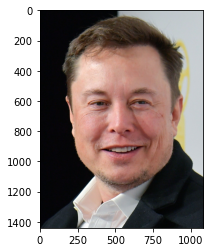

In [4]:
# Load image
img = cv2.imread(os.path.join(direct, 'assets/elon.jfif'))
plt.imshow(img[:, :, ::-1])

In [45]:
# Detect faces using haar cascade
faces = face_cascade.detectMultiScale(img, scaleFactor=1.2, minNeighbors=5)

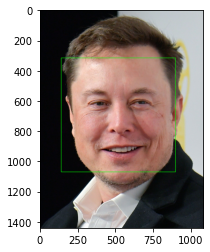

In [46]:
# Draw a rectange around detected face
img_copy = img.copy()
for (x, y, w, h) in faces:
    cv2.rectangle(img_copy, (x, y), (x+w, y+h), (0, 255, 0), 2)

plt.imshow(img_copy[:, :, ::-1])

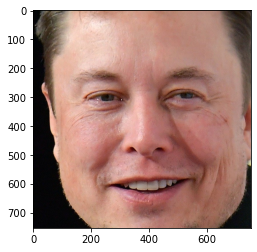

In [47]:
# Cropped face
face = img[y:y+h, x:x+w]
plt.imshow(face[:, :, ::-1])

In [48]:
# Resize to correct input size for neural networks
correct_face = cv2.resize(face, (224, 224))
print(correct_face.shape)


(224, 224, 3)


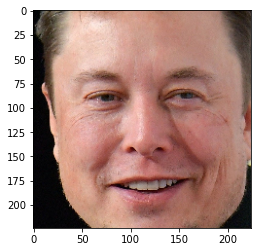

In [49]:
plt.imshow(correct_face[:, :, ::-1], cmap='gray')

In [50]:
curr_face = np.expand_dims(correct_face, axis=0) # Neural network takes a list of pictures as input
print(np.shape(curr_face))

(1, 224, 224, 3)


In [51]:
# Predict results
age_pred = age_model.predict(curr_face)
gender_pred = gender_model.predict(curr_face)
emotion_pred = emotion_model.predict(curr_face)

In [39]:
# Display results
print(age_dict[np.argmax(age_pred)])
print(gender_dict[np.argmax(gender_pred)])
print(emotion_dict[np.argmax(emotion_pred)])

(38, 43)
Male
Happy


In [52]:
# All cells inside singular function
def predict_image(img, age_model, gender_model, emotion_model, face_cascade):

    faces = face_cascade.detectMultiScale(img, scaleFactor=1.2, minNeighbors=5)

    for (x, y, w, h) in faces:
        face = img[y:y + h, x:x + w]

        correct_face = cv2.resize(face, (224, 224))

        curr_face = np.expand_dims(correct_face, axis=0)

        age_pred = age_model.predict(curr_face)
        gender_pred = gender_model.predict(curr_face)
        emotion_pred = emotion_model.predict(curr_face)

        print(age_dict[np.argmax(age_pred)])
        print(gender_dict[np.argmax(gender_pred)])
        print(emotion_dict[np.argmax(emotion_pred)])
        print()

In [53]:
predict_image(img, age_model, gender_model, emotion_model, face_cascade)

(38, 43)
Male
Happy

